In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from tqdm import tqdm

Data=pd.read_csv(r'C:\Users\hpc\Desktop\LLM\recommder\CourseraDataset-Unclean.csv')


# **Data Understanding**

In [2]:
Data.head()

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues


In [3]:
Data.describe

<bound method NDFrame.describe of                                            Course Title  Rating  \
0                                     Fashion as Design     4.8   
1                                Modern American Poetry     4.4   
2                             Pixel Art for Video Games     4.5   
3       Distribución digital de la música independiente     NaN   
4     The Blues: Understanding and Performing an Ame...     4.8   
...                                                 ...     ...   
9590                                   Power Onboarding     4.1   
9591     Implementing Parent Feedback with Google Forms     4.9   
9592                        "Making" Progress Teach-Out     4.2   
9593  Use Microsoft PowerPoint to Create a Visual Sc...     4.5   
9594  Créer du contenu pour les réseaux sociaux avec...     NaN   

               Level                      Duration           Schedule  \
0     Beginner level      20 hours (approximately)  Flexible schedule   
1     Beginner 

**Nan Values**

In [4]:
Data.isna().sum()/Data.shape[0]*100

Course Title            0.000000
Rating                 14.997394
Level                  13.183950
Duration                2.730589
Schedule                7.118291
Review                 15.039083
What you will learn    48.056279
Skill gain              0.000000
Modules                 0.000000
Instructor              0.000000
Offered By              0.000000
Keyword                 0.000000
Course Url              0.000000
dtype: float64

In [5]:
Data.isna().sum()

Course Title              0
Rating                 1439
Level                  1265
Duration                262
Schedule                683
Review                 1443
What you will learn    4611
Skill gain                0
Modules                   0
Instructor                0
Offered By                0
Keyword                   0
Course Url                0
dtype: int64

# **For Rating , Level and Review NaN values, thier values will be replaced by (0 , Not Specified and 0 review) respictively**

In [6]:
Data['Level'].unique()

array(['Beginner level', 'Intermediate level', nan, 'Advanced level'],
      dtype=object)

In [7]:
Data['Level'].fillna('Not Specified', inplace=True)

# **For Rating, if it was NaN value it will be considered as 0 rating**

In [8]:
Data['Rating'].unique()

array([4.8, 4.4, 4.5, nan, 4.6, 4.9, 4.7, 3.5, 4.3, 4.1, 4.2, 5. , 3.9,
       3.8, 4. , 3.7, 1.5, 3. , 3.4, 3.1, 3.3, 3.6, 3.2, 2.5])

In [9]:
Data['Rating'].fillna(0, inplace=True)

# **Reviewing will be like 0 review if it was NaN value**

In [10]:
Data['Review'].unique()

array(['2,813 reviews', '100 reviews', '227 reviews', ..., '689 reviews',
       '1,055 reviews', '669 reviews'], dtype=object)

In [11]:
Data['Review'].fillna('0 reviews', inplace=True)
Data['Review'] = Data['Review'].str.strip('reviews').str.strip().str.replace(r'\,', '', regex = True).astype(int)


In [12]:
Data['Review']

0       2813
1        100
2        227
3          0
4        582
        ... 
9590      36
9591      77
9592      10
9593      11
9594       0
Name: Review, Length: 9595, dtype: int32

In [13]:
Data.isna().sum()

Course Title              0
Rating                    0
Level                     0
Duration                262
Schedule                683
Review                    0
What you will learn    4611
Skill gain                0
Modules                   0
Instructor                0
Offered By                0
Keyword                   0
Course Url                0
dtype: int64

**convert a string representation and for change the empty list to Skill not inseerted**

In [14]:
Data['Skill gain']

0         ['Art History', 'Art', 'History', 'Creativity']
1                                                      []
2                                                      []
3                                                      []
4        ['Music', 'Chord', 'Jazz', 'Jazz Improvisation']
                              ...                        
9590                                                   []
9591    ['Education', 'online tools', 'engagement', 'e...
9592                                                   []
9593    ['Teaching tools', 'elementary teaching', 'eng...
9594    ['Social Media Marketing', 'Social Media', 'Co...
Name: Skill gain, Length: 9595, dtype: object

In [15]:
Data['Skill gain'] = Data['Skill gain'].apply(lambda x: ', '.join(ast.literal_eval(x)))

In [16]:
Data['Skill gain'] = Data['Skill gain'].apply(lambda x: "Skills not Inserted" if x == '' else x)

In [17]:
Data['Skill gain']

0                   Art History, Art, History, Creativity
1                                     Skills not Inserted
2                                     Skills not Inserted
3                                     Skills not Inserted
4                  Music, Chord, Jazz, Jazz Improvisation
                              ...                        
9590                                  Skills not Inserted
9591    Education, online tools, engagement, elementar...
9592                                  Skills not Inserted
9593    Teaching tools, elementary teaching, engaging ...
9594    Social Media Marketing, Social Media, Content ...
Name: Skill gain, Length: 9595, dtype: object

# **fill NaN values in the What you will learn column by concatenating the Keyword and Skill gain columns**

In [18]:
Data['What you will learn'].unique()

array([nan,
       'Students will be able to describe the blues as an important musical form. Students will be able to explain differences in jazz and other variations of the blues. ',
       'Gain an appreciation for the Argentine Tango as a multidimensional art form, including music, dance, and poetry.List the components that make a tango.Eexplore the tango as a living art form today and how it can be used to cross cultural boundaries and stereotypes.',
       ...,
       'How to use data to make informed decisions and adopt policies during a pandemicHow to implement best practices to address pandemic challenges',
       'Conocer las características de los conceptos de felicidad y políticas públicas y cómo influye la felicidad a la hora de diseñar las políticas. Distinguir entre la visión tradicional y la nueva perspectiva de ciudadanía, y definir la ciudadanía social y su relevancia en derechos básicos.  Analizar los usos de "satisfacción con la democracia" y el rol de formuladores 

In [19]:
Data['What you will learn'] = Data.apply(
    lambda row: row['Keyword'] if pd.isna(row['What you will learn']) and row['Skill gain'] == 'Skills not Inserted'
                else (f"{row['Skill gain']} {row['Keyword']}" if pd.isna(row['What you will learn']) else row['What you will learn']),
    axis=1
)

In [20]:
Data['What you will learn']

0       Art History, Art, History, Creativity Arts and...
1                                     Arts and Humanities
2                                     Arts and Humanities
3                                     Arts and Humanities
4       Students will be able to describe the blues as...
                              ...                        
9590                                      Social Sciences
9591    Creating engaging parent surveys using Google ...
9592                                      Social Sciences
9593    Learn about choice boards and their use within...
9594    Vous découvrirez les fonctionnalités de Prezi ...
Name: What you will learn, Length: 9595, dtype: object

# **Converting a string representation for Instructor , Modules and Offered by**

In [21]:
Data.columns

Index(['Course Title', 'Rating', 'Level', 'Duration', 'Schedule', 'Review',
       'What you will learn', 'Skill gain', 'Modules', 'Instructor',
       'Offered By', 'Keyword', 'Course Url'],
      dtype='object')

In [22]:
Data['Instructor'].unique()

array(["['Anna Burckhardt', 'Paola Antonelli', 'Michelle Millar Fisher', 'Stephanie Kramer']",
       "['Cary Nelson']", "['Andrew Dennis', 'Ricardo Guimaraes']", ...,
       "['Lina Armendariz', 'Iñaqui De Olaizola']",
       "['Cassandra Crifasi, PhD, MPH', 'Rebecca G. Williams, MSPH']",
       "['You (Lilian) Cheng']"], dtype=object)

In [23]:
Data['Instructor'] = Data['Instructor'].apply(lambda x: ', '.join(ast.literal_eval(x)))
Data['Instructor']

0       Anna Burckhardt, Paola Antonelli, Michelle Mil...
1                                             Cary Nelson
2                        Andrew Dennis, Ricardo Guimaraes
3                               Eduardo de la Vara Brown.
4                                       Dariusz Terefenko
                              ...                        
9590                                     William J. White
9591                                       Rachel Lindsay
9592                                       Pablo Palomino
9593                                       Rachel Lindsay
9594                                        Sara Nefzaoui
Name: Instructor, Length: 9595, dtype: object

In [24]:
Data['Modules'].unique

<bound method Series.unique of 0       ['Introduction', 'Heroes', 'Silhouettes', 'Cou...
1       ['Orientation', 'Module 1', 'Module 2', 'Modul...
2       ['Week 1: Introduction to Pixel Art', 'Week 2:...
3        ['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']
4       ['Blues Progressions – Theory and Practice ', ...
                              ...                        
9590    ['Week 1 - Get Ready', 'Session 2 - Get Set', ...
9591                               ['Learn step-by-step']
9592                                 ['Week 1', 'WEEK 2']
9593                               ['Learn step-by-step']
9594                               ['Learn step-by-step']
Name: Modules, Length: 9595, dtype: object>

In [25]:
Data['Modules']=Data['Modules'].apply(lambda x: ', '.join(ast.literal_eval(x)))
Data['Modules']

0       Introduction, Heroes, Silhouettes, Coutures, L...
1       Orientation, Module 1, Module 2, Module 3, Mod...
2       Week 1: Introduction to Pixel Art, Week 2: Pix...
3                  Semana 1, Semana 2, Semana 3, Semana 4
4       Blues Progressions – Theory and Practice , Blu...
                              ...                        
9590    Week 1 - Get Ready, Session 2 - Get Set, Sessi...
9591                                   Learn step-by-step
9592                                       Week 1, WEEK 2
9593                                   Learn step-by-step
9594                                   Learn step-by-step
Name: Modules, Length: 9595, dtype: object

In [26]:
Data['Offered By'].unique

<bound method Series.unique of 0                         ['The Museum of Modern Art']
1       ['University of Illinois at Urbana-Champaign']
2                        ['Michigan State University']
3                             ['SAE Institute México']
4                          ['University of Rochester']
                             ...                      
9590                       ['Northwestern University']
9591                      ['Coursera Project Network']
9592                              ['Emory University']
9593                      ['Coursera Project Network']
9594                      ['Coursera Project Network']
Name: Offered By, Length: 9595, dtype: object>

In [27]:
Data['Offered By'] = Data['Offered By'].apply(lambda x: ', '.join(ast.literal_eval(x)))
Data['Offered By']

0                         The Museum of Modern Art
1       University of Illinois at Urbana-Champaign
2                        Michigan State University
3                             SAE Institute México
4                          University of Rochester
                           ...                    
9590                       Northwestern University
9591                      Coursera Project Network
9592                              Emory University
9593                      Coursera Project Network
9594                      Coursera Project Network
Name: Offered By, Length: 9595, dtype: object

# **Replacing NaN Values for Duration and Schedule to Not Given and Unknown respectively**

In [28]:
Data['Duration'].isna().sum()

262

In [29]:
Data['Duration'] = Data['Duration'].fillna("Not Given")
Data['Duration']

0           20 hours (approximately)
1       Approx. 34 hours to complete
2            9 hours (approximately)
3        Approx. 8 hours to complete
4       Approx. 11 hours to complete
                    ...             
9590     Approx. 7 hours to complete
9591                       Not Given
9592     Approx. 5 hours to complete
9593                          1 hour
9594                       Not Given
Name: Duration, Length: 9595, dtype: object

In [30]:
Data['Schedule']= Data['Schedule'].fillna("Unknown")
Data['Schedule']

0       Flexible schedule
1       Flexible schedule
2       Flexible schedule
3       Flexible schedule
4       Flexible schedule
              ...        
9590    Flexible schedule
9591              Unknown
9592    Flexible schedule
9593              Unknown
9594              Unknown
Name: Schedule, Length: 9595, dtype: object

In [31]:
import re  

def duration_cleaning(val):
    # Dictionary to map number words to their corresponding integer values
    word_to_num = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
                   'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'zero': 0}

    # Check if the duration contains 'mins' or 'minutes'
    if 'mins' in val or 'minutes' in val:
        try:
            # Extract numeric values corresponding to hours and minutes
            hours_and_minutes = list(map(int, re.findall(r'\d+(?=\shour)|\d+(?=\smins)|\d+(?=\sminutes)', val)))
            # Calculate total duration in hours (hours + minutes/60)
            return hours_and_minutes[0] + (hours_and_minutes[1] / 60) if len(hours_and_minutes) > 1 else hours_and_minutes[0]
        except:
            print(f"Error processing value: {val}")

    # Check if the duration contains 'month'
    elif 'month' in val:
        try:
            # Extract numeric values corresponding to months and hours
            months_and_hours = list(map(int, re.findall(r'\d+(?=\smonth)|\d+(?=\shour)', val)))
            # Calculate total duration in hours assuming 4 weeks per month
            return months_and_hours[0] * 4 * months_and_hours[1] if len(months_and_hours) > 1 else months_and_hours[0] * 4
        except:
            print(f"Error processing value: {val}")

    # Check if the duration contains 'hour'
    elif 'hour' in val:
        try:
            # Extract numeric or word-based values corresponding to hours
            hours = re.findall(r'\d+(?=\shour)|\w+(?=\shour)', val)
            if hours:
                # Convert word-based numbers to integer values if applicable
                return word_to_num[hours[0]] if hours[0].isalpha() else float(hours[0])
        except:
            print(f"Error processing value: {val}")

    # If no conditions are met, return None (or any default value)
    return None


In [32]:
Data['duration_in_hours']=Data['Duration']
Data.loc[Data['duration_in_hours']=='one hour', 'duration_in_hours']= '1 hour'
Data.loc[Data['duration_in_hours']=="Not Given", 'duration_in_hours']= '0 hour'
Data.loc[Data['duration_in_hours']=='This project should take approximately two hours to complete including, Videos, Tasks, and Quiz', 'duration_in_hours']=  '2 hour'
Data['duration_in_hours'] = Data['duration_in_hours'].apply(duration_cleaning)
Data['duration_in_hours']

0       20.0
1       34.0
2        9.0
3        8.0
4       11.0
        ... 
9590     7.0
9591     0.0
9592     5.0
9593     1.0
9594     0.0
Name: duration_in_hours, Length: 9595, dtype: float64

# **Final Cleaned Data**

In [33]:
Data.head()

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,duration_in_hours
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,2813,"Art History, Art, History, Creativity Arts and...","Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100,Arts and Humanities,Skills not Inserted,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227,Arts and Humanities,Skills not Inserted,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0
3,Distribución digital de la música independiente,0.0,Beginner level,Approx. 8 hours to complete,Flexible schedule,0,Arts and Humanities,Skills not Inserted,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0


In [34]:
Data.isna().sum()

Course Title           0
Rating                 0
Level                  0
Duration               0
Schedule               0
Review                 0
What you will learn    0
Skill gain             0
Modules                0
Instructor             0
Offered By             0
Keyword                0
Course Url             0
duration_in_hours      0
dtype: int64

In [35]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9595 entries, 0 to 9594
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Title         9595 non-null   object 
 1   Rating               9595 non-null   float64
 2   Level                9595 non-null   object 
 3   Duration             9595 non-null   object 
 4   Schedule             9595 non-null   object 
 5   Review               9595 non-null   int32  
 6   What you will learn  9595 non-null   object 
 7   Skill gain           9595 non-null   object 
 8   Modules              9595 non-null   object 
 9   Instructor           9595 non-null   object 
 10  Offered By           9595 non-null   object 
 11  Keyword              9595 non-null   object 
 12  Course Url           9595 non-null   object 
 13  duration_in_hours    9595 non-null   float64
dtypes: float64(2), int32(1), object(11)
memory usage: 1012.1+ KB


# **EDA**

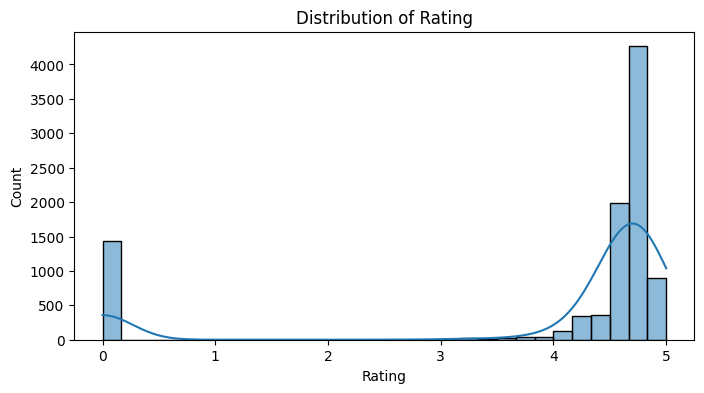

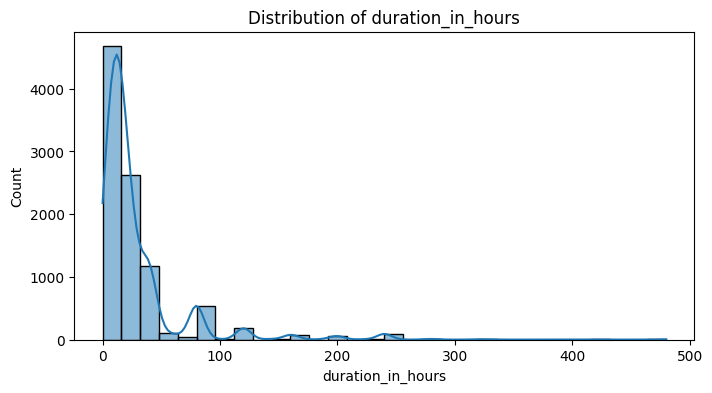

In [36]:


numerical_columns = ['Rating', 'duration_in_hours']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(Data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


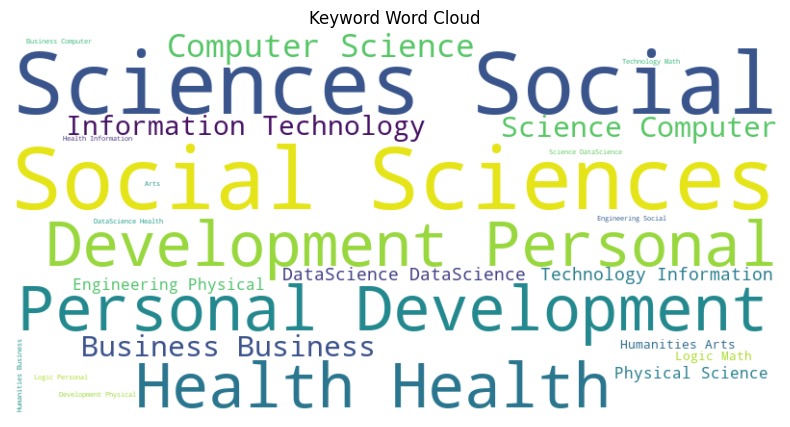

In [37]:


# Combine all text from 'Keyword' or 'What you will learn'
text = ' '.join(Data['Keyword'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Word Cloud')
pio.renderers.default = 'iframe'
plt.show()

Text(0.5, 1.02, 'Pair Plot for Multivariate Analysis')

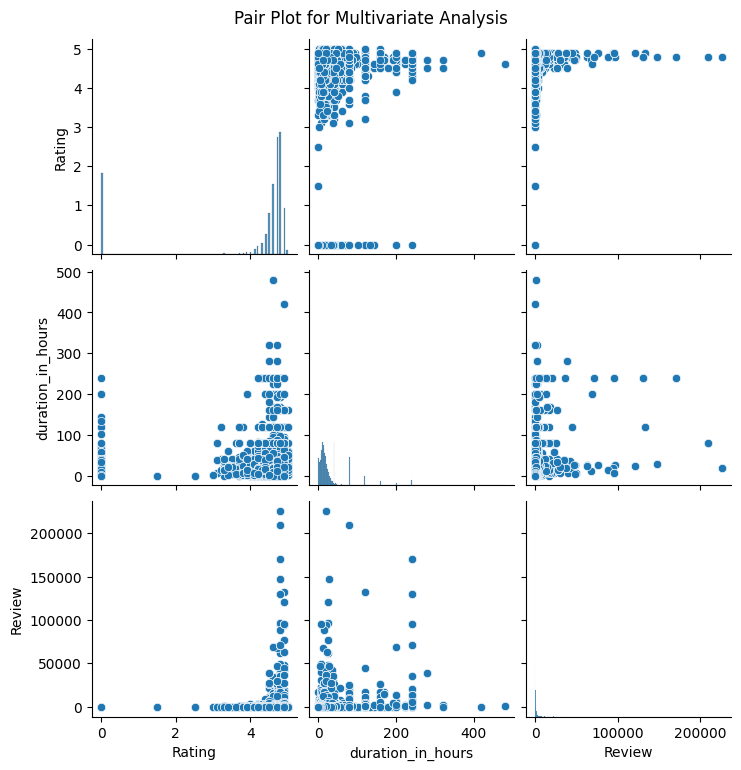

In [38]:
pair_plot = Data[['Rating', 'duration_in_hours', 'Review']]
pair_plot
sns.pairplot(pair_plot)
plt.suptitle('Pair Plot for Multivariate Analysis', y=1.02)

Text(0.5, 1.02, 'Pair Plot of Course Features')

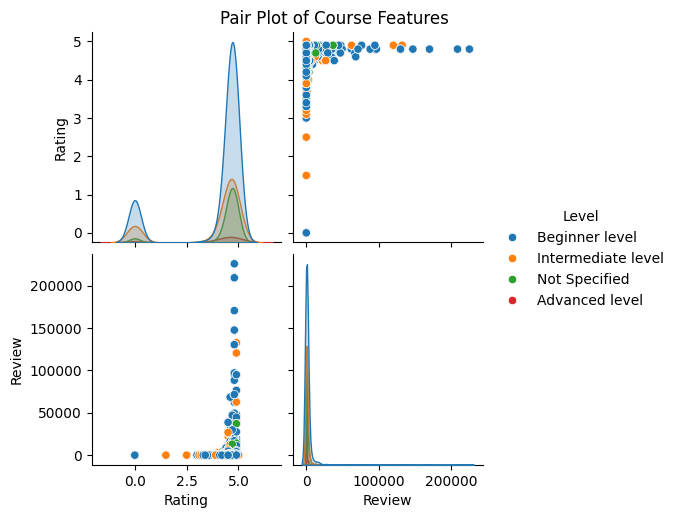

In [39]:
sns.pairplot(Data[['Rating', 'Review', 'Level']], hue='Level')
plt.suptitle('Pair Plot of Course Features',y=1.02)


In [40]:



# Include 'Rating' and 'course_title' in the DataFrame used for plotting
Data1 = Data[['Review', 'duration_in_hours', 'Rating','Course Title']]

# Create a scatter plot using the correct column names
fig2 = px.scatter(Data1, 
                 x='Review', 
                 y='duration_in_hours',
                 size='Rating',  # Use 'Rating' column for size
                 color='Rating',  # Use 'Rating' column for color
                 title='Popularity vs. Duration and Reviews',
                 labels={'Review': 'Number of Reviews', 'duration_in_hours': 'Duration '},
                 hover_name='Course Title')  # Use 'course_title' for hover info

# Show the plot
pio.renderers.default = 'iframe'
fig2.show()

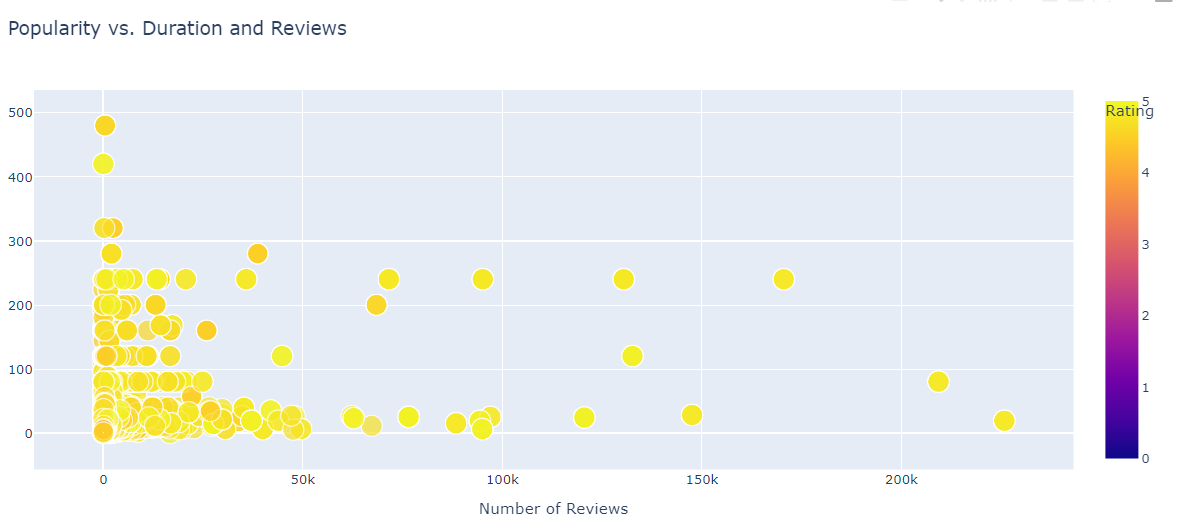

# **Course Recommender**

In [41]:
def Labels_presentation(Row):
    Labels_presentation= f""" Course Title: {Row['Course Title']}
    Rating: {Row['Rating']}
    Level: {Row['Level']}
    Duration: {Row['Duration']}
    Schedule: {Row['Schedule']}
    Review: {Row['Review']}
    What you will learn: {Row['What you will learn']}
    Skill gain: {Row['Skill gain']}
    Modules: {Row['Modules']}
    Instructor: {Row['Instructor']}
    Offered By: {Row['Offered By']}
    Keyword: {Row['Keyword']}
    Course URL: {Row['Course Url']}
    duration_in_hours: {Row['duration_in_hours']}
    """
    return Labels_presentation

In [42]:
print(Data.iloc[:-1].apply(Labels_presentation,axis=1).values[0])

 Course Title: Fashion as Design
    Rating: 4.8
    Level: Beginner level
    Duration: 20 hours (approximately)
    Schedule: Flexible schedule
    Review: 2813
    What you will learn: Art History, Art, History, Creativity Arts and Humanities
    Skill gain: Art History, Art, History, Creativity
    Modules: Introduction, Heroes, Silhouettes, Coutures, Lifecycle, Modesty, Expression
    Instructor: Anna Burckhardt, Paola Antonelli, Michelle Millar Fisher, Stephanie Kramer
    Offered By: The Museum of Modern Art
    Keyword: Arts and Humanities
    Course URL: https://www.coursera.org/learn/fashion-design
    duration_in_hours: 20.0
    


In [43]:
Data.columns

Index(['Course Title', 'Rating', 'Level', 'Duration', 'Schedule', 'Review',
       'What you will learn', 'Skill gain', 'Modules', 'Instructor',
       'Offered By', 'Keyword', 'Course Url', 'duration_in_hours'],
      dtype='object')

In [44]:
Data["Represented_data"]=Data.iloc[:].apply(Labels_presentation,axis=1)

In [45]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9595 entries, 0 to 9594
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Title         9595 non-null   object 
 1   Rating               9595 non-null   float64
 2   Level                9595 non-null   object 
 3   Duration             9595 non-null   object 
 4   Schedule             9595 non-null   object 
 5   Review               9595 non-null   int32  
 6   What you will learn  9595 non-null   object 
 7   Skill gain           9595 non-null   object 
 8   Modules              9595 non-null   object 
 9   Instructor           9595 non-null   object 
 10  Offered By           9595 non-null   object 
 11  Keyword              9595 non-null   object 
 12  Course Url           9595 non-null   object 
 13  duration_in_hours    9595 non-null   float64
 14  Represented_data     9595 non-null   object 
dtypes: float64(2), int32(1), object(12)
me

In [46]:
import faiss
import requests
import numpy as np

Dim=4096

index=faiss.IndexFlatL2(Dim)
X=np.zeros((len(Data['Represented_data']),Dim),dtype='float32')

In [49]:
for i, representation in enumerate(tqdm(Data['Represented_data'], desc='Processing Representations')):

    res=requests.post('http://localhost:11434/api/embeddings',
    json={
        'model':'llama2',
        'prompt':representation
    })
    embedding=res.json()['embedding']
    X[i]=np.array(embedding)

index.add(X)



Processing Representations: 100%|██████████| 9595/9595 [5:42:44<00:00,  2.14s/it]  


In [50]:
faiss.write_index(index,'index_label')

In [51]:
%cd

C:\Users\hpc


In [52]:
Read_index=faiss.read_index('index_label')

In [63]:
Data[Data.Level.str.contains('Beginner level')]

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,duration_in_hours,Represented_data
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,2813,"Art History, Art, History, Creativity Arts and...","Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,Course Title: Fashion as Design\n Rating: ...
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100,Arts and Humanities,Skills not Inserted,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,Course Title: Modern American Poetry\n Rat...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227,Arts and Humanities,Skills not Inserted,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,Course Title: Pixel Art for Video Games\n ...
3,Distribución digital de la música independiente,0.0,Beginner level,Approx. 8 hours to complete,Flexible schedule,0,Arts and Humanities,Skills not Inserted,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,Course Title: Distribución digital de la músi...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,Course Title: The Blues: Understanding and Pe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36,Social Sciences,Skills not Inserted,"Week 1 - Get Ready, Session 2 - Get Set, Sessi...",William J. White,Northwestern University,Social Sciences,https://www.coursera.org/learn/power-onboarding,7.0,Course Title: Power Onboarding\n Rating: 4...
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,Not Given,Unknown,77,Creating engaging parent surveys using Google ...,"Education, online tools, engagement, elementar...",Learn step-by-step,Rachel Lindsay,Coursera Project Network,Social Sciences,https://www.coursera.org/projects/education-fe...,0.0,Course Title: Implementing Parent Feedback wi...
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10,Social Sciences,Skills not Inserted,"Week 1, WEEK 2",Pablo Palomino,Emory University,Social Sciences,https://www.coursera.org/learn/makingprogress,5.0,"Course Title: ""Making"" Progress Teach-Out\n ..."
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,Unknown,11,Learn about choice boards and their use within...,"Teaching tools, elementary teaching, engaging ...",Learn step-by-step,Rachel Lindsay,Coursera Project Network,Social Sciences,https://www.coursera.org/projects/use-microsof...,1.0,Course Title: Use Microsoft PowerPoint to Cre...


In [76]:
Data[Data.Keyword.str.contains('Social')]

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,duration_in_hours,Represented_data
7699,Methods and Statistics in Social Sciences Spec...,4.6,Beginner level,3 months at 10 hours a week,Flexible schedule,4077,"Statistics, Statistical Inference, R Programmi...","Statistics, Statistical Inference, R Programmi...","Quantitative Methods, Qualitative Research Met...","Matthijs Rooduijn, Annemarie Zand Scholten, Ge...",University of Amsterdam,Social Sciences,https://www.coursera.org/specializations/socia...,120.0,Course Title: Methods and Statistics in Socia...
7700,Social Psychology,4.7,Beginner level,Approx. 38 hours to complete,Flexible schedule,4719,Social Sciences,Skills not Inserted,"WEEK 1: Social Perceptions and Misperceptions,...",Scott Plous,Wesleyan University,Social Sciences,https://www.coursera.org/learn/social-psychology,38.0,Course Title: Social Psychology\n Rating: ...
7701,Classical Sociological Theory,4.9,Not Specified,Approx. 13 hours to complete,Flexible schedule,2773,Social Sciences,Skills not Inserted,Session 1: Classical Sociological Theory - An ...,"Danny de Vries, Bart van Heerikhuizen",University of Amsterdam,Social Sciences,https://www.coursera.org/learn/classical-socio...,13.0,Course Title: Classical Sociological Theory \...
7702,Narrative Economics,4.8,Beginner level,Approx. 5 hours to complete,Flexible schedule,381,How and why certain stories go viral.How viral...,"Economics, Research Methods, History, Financia...","Introduction, Seven Propositions of Narrative...",Robert Shiller,Yale University,Social Sciences,https://www.coursera.org/learn/narrative-econo...,5.0,Course Title: Narrative Economics\n Rating...
7703,Microeconomics Principles,4.8,Beginner level,Approx. 26 hours to complete,Flexible schedule,2919,Identifying hidden costs of anything,"Economics, Critical Thinking, Microeconomics, ...","Course Orientation, Introduction and Basic Pri...",Dr. José J. Vázquez-Cognet,University of Illinois at Urbana-Champaign,Social Sciences,https://www.coursera.org/learn/microeconomics,26.0,Course Title: Microeconomics Principles\n ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36,Social Sciences,Skills not Inserted,"Week 1 - Get Ready, Session 2 - Get Set, Sessi...",William J. White,Northwestern University,Social Sciences,https://www.coursera.org/learn/power-onboarding,7.0,Course Title: Power Onboarding\n Rating: 4...
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,Not Given,Unknown,77,Creating engaging parent surveys using Google ...,"Education, online tools, engagement, elementar...",Learn step-by-step,Rachel Lindsay,Coursera Project Network,Social Sciences,https://www.coursera.org/projects/education-fe...,0.0,Course Title: Implementing Parent Feedback wi...
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10,Social Sciences,Skills not Inserted,"Week 1, WEEK 2",Pablo Palomino,Emory University,Social Sciences,https://www.coursera.org/learn/makingprogress,5.0,"Course Title: ""Making"" Progress Teach-Out\n ..."
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,Unknown,11,Learn about choice boards and their use within...,"Teaching tools, elementary teaching, engaging ...",Learn step-by-step,Rachel Lindsay,Coursera Project Network,Social Sciences,https://www.coursera.org/projects/use-microsof...,1.0,Course Title: Use Microsoft PowerPoint to Cre...


In [87]:
Data[Data['duration_in_hours'].astype(str).str.contains('20.0')]

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,duration_in_hours,Represented_data
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,2813,"Art History, Art, History, Creativity Arts and...","Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,Course Title: Fashion as Design\n Rating: ...
24,游戏产业概论,3.5,Beginner level,20 hours (approximately),Flexible schedule,66,Arts and Humanities,Skills not Inserted,"绪论, 游戏硬件与软件发展历程, 游戏类型划分, 大师是怎样炼成的？, 游戏产业知识产权法律...",胡东雁,"Fudan University, 上海戏剧学院",Arts and Humanities,https://www.coursera.org/learn/youxi-chanye-ga...,20.0,Course Title: 游戏产业概论\n Rating: 3.5\n Le...
78,"The Modern World, Part Two: Global History sin...",4.8,Beginner level,Approx. 20 hours to complete,Flexible schedule,1527,Arts and Humanities,Skills not Inserted,"Crackup (1905-1917), New Orders Emerge (1917-1...",Philip Zelikow,University of Virginia,Arts and Humanities,https://www.coursera.org/learn/modern-world-2,20.0,"Course Title: The Modern World, Part Two: Glo..."
138,The Ancient Greeks,4.7,Not Specified,Approx. 20 hours to complete,Flexible schedule,1950,"Art History, Greek Mythology, History, Ancient...","Art History, Greek Mythology, History, Ancient...","Prehistory to Homer, The Archaic Age (ca. 800-...","Andrew Szegedy-Maszak, PhD",Wesleyan University,Arts and Humanities,https://www.coursera.org/learn/ancient-greeks,20.0,Course Title: The Ancient Greeks\n Rating:...
201,Inequality and Democracy,4.8,Beginner level,Approx. 20 hours to complete,Flexible schedule,28,"Philosophy, Economics, History, Political Scie...","Philosophy, Economics, History, Political Scie...","Economic inequality, Property and corporations...","Yara Salman, Michael Bennett, Rutger Claassen",Utrecht University,Arts and Humanities,https://www.coursera.org/learn/inequality-and-...,20.0,Course Title: Inequality and Democracy\n R...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,The Influence of Social Context on Health,0.0,Intermediate level,20 hours (approximately),Flexible schedule,0,Identify ways in which conditions in the healt...,"Evaluation, disease, social epidemiology, sexu...","Week 1, Week 2, Week 3, Week 4","Belinda Needham, Briana Mezuk",University of Michigan,Social Sciences,https://www.coursera.org/learn/the-influence-o...,20.0,Course Title: The Influence of Social Context...
9479,Global Systemic Risk,4.7,Beginner level,Approx. 20 hours to complete,Flexible schedule,266,We introduce several new analytical concepts a...,Skills not Inserted,"Week 1: Introduction, What is Globalization, D...",Miguel A. Centeno,Princeton University,Social Sciences,https://www.coursera.org/learn/global-systemic...,20.0,Course Title: Global Systemic Risk \n Rati...
9489,SEL Capstone,4.6,Advanced level,20 hours (approximately),Flexible schedule,48,Effectively implement social emotional learnin...,"Evaluation, Emotional Engagement, Teaching and...",Introduction and Explanation of Capstone Proje...,"Emily Claire Price, Randy Testa, Ben Kirshner,...",University of Colorado Boulder,Social Sciences,https://www.coursera.org/learn/sel-capstone,20.0,Course Title: SEL Capstone\n Rating: 4.6\n...
9503,Calculus: Single Variable Part 4 - Applications,4.9,Not Specified,Approx. 20 hours to complete,Flexible schedule,257,Social Sciences,Skills not Inserted,"Computing Areas and Volumes, Other Geometric A...",Robert Ghrist,University of Pennsylvania,Social Sciences,https://www.coursera.org/learn/applications-ca...,20.0,Course Title: Calculus: Single Variable Part ...


In [78]:
Fav=Data.iloc[7699]

In [ ]:
 Requests= requests.post()

In [80]:
resq=requests.post('http://localhost:11434/api/embeddings',
    json={
        'model':'llama2',
        'prompt':Fav['Represented_data']
    })

In [81]:
embedding=np.array([resq.json()['embedding']],dtype='float32')

In [82]:
D,I=index.search(embedding,15)

In [84]:
best=np.array(Data['Represented_data'])[I.flatten()]

In [86]:
for match in best:
    print(match)

 Course Title: Methods and Statistics in Social Sciences Specialization
    Rating: 4.6
    Level: Beginner level
    Duration: 3 months at 10 hours a week
    Schedule: Flexible schedule
    Review: 4077
    What you will learn: Statistics, Statistical Inference, R Programming, Qualitative Research Social Sciences
    Skill gain: Statistics, Statistical Inference, R Programming, Qualitative Research
    Modules: Quantitative Methods, Qualitative Research Methods, Basic Statistics, Inferential Statistics, Methods and Statistics in Social Science - Final Research Project
    Instructor: Matthijs Rooduijn, Annemarie Zand Scholten, Gerben Moerman, Emiel van Loon
    Offered By: University of Amsterdam
    Keyword: Social Sciences
    Course URL: https://www.coursera.org/specializations/social-science
    duration_in_hours: 120.0
    
 Course Title: Methods and Statistics in Social Sciences Specialization
    Rating: 4.6
    Level: Beginner level
    Duration: 3 months at 10 hours a week
 